In [60]:
from bayespy.nodes import Gaussian, Gamma
from bayespy.inference import VB
from bayespy.nodes import Dirichlet, Categorical
from bayespy.nodes import Gaussian, Wishart
from bayespy.nodes import GaussianARD, Wishart

from bayespy.nodes import Mixture
import numpy as np
import matplotlib.pyplot as plt
import bayespy.plot as bpplt


In [61]:
data = np.random.normal(5, 1, size=(100,))
xrange = np.linspace(0,10,100)

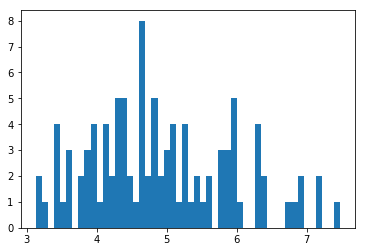

In [62]:
plt.figure()
plt.hist(data , 50)
plt.show()

In [63]:
mu = GaussianARD(0, 1)
tau = Gamma(10**-6, 10**-6)
y = GaussianARD(mu, tau, plates=(100,))
#### here we define our model using graphical model notation

In [64]:
y.observe(data)

In [65]:
Q = VB(mu, tau, y)

In [66]:
Q.update(repeat= 50)

Iteration 1: loglike=-1.719460e+02 (0.003 seconds)
Iteration 2: loglike=-1.719456e+02 (0.004 seconds)
Converged at iteration 2.


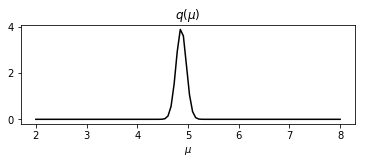

In [67]:
plt.subplot(2,1,1)
bpplt.pdf(mu, np.linspace(2, 8, num=100), color='k', name=r'\mu')
#bpplt.pyplot.subplot(2, 1, 2)
#bpplt.pdf(tau, np.linspace(1e-6, 200, num=100), color='k', name=r'\tau')
bpplt.pyplot.show()


In [ ]:
## not sure what this is showing
bpplt.pdf(y, np.linspace(-10, 10, num=100), color='k', name=r'y')
#bpplt.pyplot.subplot(2, 1, 2)
plt.show()

### Gaussian Mixture Model

In [19]:
y0 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.1]], size=100)
y1 = np.random.multivariate_normal([10, 5], [[0.1, 0], [0, 2]], size=100)
y2 = np.random.multivariate_normal([-10, 8], [[2, -1.5], [-1.5, 2]], size=100)
y3 = np.random.multivariate_normal([-2, -20], [[0.5, 0], [0, 0.5]], size=100)
y = np.vstack([y0, y1, y2, y3])

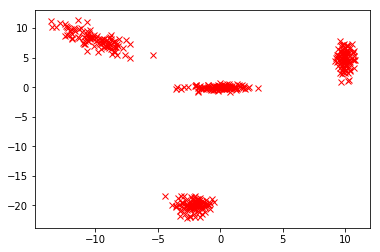

In [20]:
bpplt.pyplot.plot(y[:,0], y[:,1], 'rx')
plt.show()

In [51]:
### define variables essential to the problem 
N = 400    # number of points
D = 2      # dimensionality of data
K = 8  ##number of groups must be at least as big as true value


In [52]:
alpha = Dirichlet(1e-5*np.ones(K),
                   name='alpha')
Z = Categorical(alpha,
                plates=(N,),
                name='z')

In [53]:
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D),
               plates=(K,),
             name='mu')
Lambda = Wishart(D, 1e-5*np.identity(D),
                  plates=(K,),
                 name='Lambda')

In [54]:
Y = Mixture(Z, Gaussian, mu, Lambda
            ,name='Y')
Z.initialize_from_random()


In [55]:
from bayespy.inference import VB
Q = VB(Y, mu, Lambda, Z, alpha)


In [56]:
Y.observe(y)

In [57]:
Q.update(repeat=1000)

Iteration 1: loglike=-3.471494e+03 (0.015 seconds)
Iteration 2: loglike=-3.328712e+03 (0.010 seconds)
Iteration 3: loglike=-3.261308e+03 (0.010 seconds)
Iteration 4: loglike=-3.084459e+03 (0.009 seconds)
Iteration 5: loglike=-2.806744e+03 (0.014 seconds)
Iteration 6: loglike=-2.575329e+03 (0.012 seconds)
Iteration 7: loglike=-2.408190e+03 (0.009 seconds)
Iteration 8: loglike=-2.176848e+03 (0.009 seconds)
Iteration 9: loglike=-2.073795e+03 (0.008 seconds)
Iteration 10: loglike=-1.942705e+03 (0.010 seconds)
Iteration 11: loglike=-1.856558e+03 (0.009 seconds)
Iteration 12: loglike=-1.803009e+03 (0.008 seconds)
Iteration 13: loglike=-1.772844e+03 (0.008 seconds)
Iteration 14: loglike=-1.772540e+03 (0.008 seconds)
Iteration 15: loglike=-1.772287e+03 (0.009 seconds)
Iteration 16: loglike=-1.772038e+03 (0.008 seconds)
Iteration 17: loglike=-1.771777e+03 (0.008 seconds)
Iteration 18: loglike=-1.771488e+03 (0.008 seconds)
Iteration 19: loglike=-1.771156e+03 (0.008 seconds)
Iteration 20: loglike

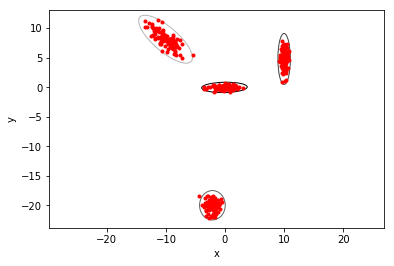

In [59]:
plt.figure()
bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()